# Imports

## Import libraries

In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import torch
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict

from torchview import draw_graph
from torchinfo import summary


## importing dataset

In [2]:
# fetch dataset 
molecular_biology_splice_junction_gene_sequences = fetch_ucirepo(id=69) 
  
# data (as pandas dataframes) 
X = molecular_biology_splice_junction_gene_sequences.data.features 
y = molecular_biology_splice_junction_gene_sequences.data.targets 
  
# metadata 
print(molecular_biology_splice_junction_gene_sequences.metadata) 
  
# variable information 
print(molecular_biology_splice_junction_gene_sequences.variables) 


{'uci_id': 69, 'name': 'Molecular Biology (Splice-junction Gene Sequences)', 'repository_url': 'https://archive.ics.uci.edu/dataset/69/molecular+biology+splice+junction+gene+sequences', 'data_url': 'https://archive.ics.uci.edu/static/public/69/data.csv', 'abstract': 'Primate splice-junction gene sequences (DNA) with associated imperfect domain theory', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Sequential', 'Domain-Theory'], 'num_instances': 3190, 'num_features': 60, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': ['instancename'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5M888', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Problem Description: \r\n      \r\nSplice junctions are points on a DNA sequence at which `superfluous\' DNA is removed during the process of protein creation in

# EDA

In [3]:
pd.unique(molecular_biology_splice_junction_gene_sequences.variables.missing_values)

array(['no'], dtype=object)

In [4]:
X

,Base1,Base2,Base3,Base4,Base5,Base6,Base7,Base8,Base9,Base10,...,Base51,Base52,Base53,Base54,Base55,Base56,Base57,Base58,Base59,Base60
0,C,C,A,G,C,T,G,C,A,T,...,A,G,C,C,A,G,T,C,T,G
1,A,G,A,C,C,C,G,C,C,G,...,G,T,G,C,C,C,C,C,G,C
2,G,A,G,G,T,G,A,A,G,G,...,C,A,C,G,G,G,G,A,T,G
3,G,G,G,C,T,G,C,G,T,T,...,G,G,T,T,T,T,C,C,C,C
4,G,C,T,C,A,G,C,C,C,C,...,C,C,T,T,G,A,C,C,C,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,T,C,T,C,T,T,C,C,C,T,...,T,T,C,C,T,C,T,C,T,T
3186,G,A,G,C,T,C,C,C,A,G,...,G,G,C,A,C,A,G,C,T,G
3187,T,C,T,C,G,G,G,G,G,C,...,C,G,T,G,T,G,T,G,T,C
3188,A,T,T,C,T,A,C,T,T,A,...,A,C,C,A,A,A,A,C,A,A


In [5]:
feature_encoder = preprocessing.LabelEncoder()     

dna_string_list = [] 
for row in X.itertuples(index=False): 
    dna_string_nparray = np.array(list(row))  
    dna_labelencoder_row = feature_encoder.fit_transform(dna_string_nparray)       
    dna_string_list.append(dna_labelencoder_row)  
feature = pd.DataFrame(dna_string_list, columns=X.columns)        
feature   

,Base1,Base2,Base3,Base4,Base5,Base6,Base7,Base8,Base9,Base10,...,Base51,Base52,Base53,Base54,Base55,Base56,Base57,Base58,Base59,Base60
0,1,1,0,2,1,3,2,1,0,3,...,0,2,1,1,0,2,3,1,3,2
1,0,2,0,1,1,1,2,1,1,2,...,2,3,2,1,1,1,1,1,2,1
2,2,0,2,2,3,2,0,0,2,2,...,1,0,1,2,2,2,2,0,3,2
3,2,2,2,1,3,2,1,2,3,3,...,2,2,3,3,3,3,1,1,1,1
4,2,1,3,1,0,2,1,1,1,1,...,1,1,3,3,2,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,1,0,1,0,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,1
3186,2,0,2,1,3,1,1,1,0,2,...,2,2,1,0,1,0,2,1,3,2
3187,3,1,3,1,2,2,2,2,2,1,...,1,2,3,2,3,2,3,2,3,1
3188,0,3,3,1,3,0,1,3,3,0,...,0,1,1,0,0,0,0,1,0,0


In [6]:
y

,class
0,EI
1,EI
2,EI
3,EI
4,EI
...,...
3185,N
3186,N
3187,N
3188,N


In [7]:
label_encoder = preprocessing.LabelEncoder()     
label = pd.DataFrame(label_encoder.fit_transform(y["class"].values)) 
label   

,0
0,0
1,0
2,0
3,0
4,0
...,...
3185,2
3186,2
3187,2
3188,2


Text(0.5, 0, 'Correlation')

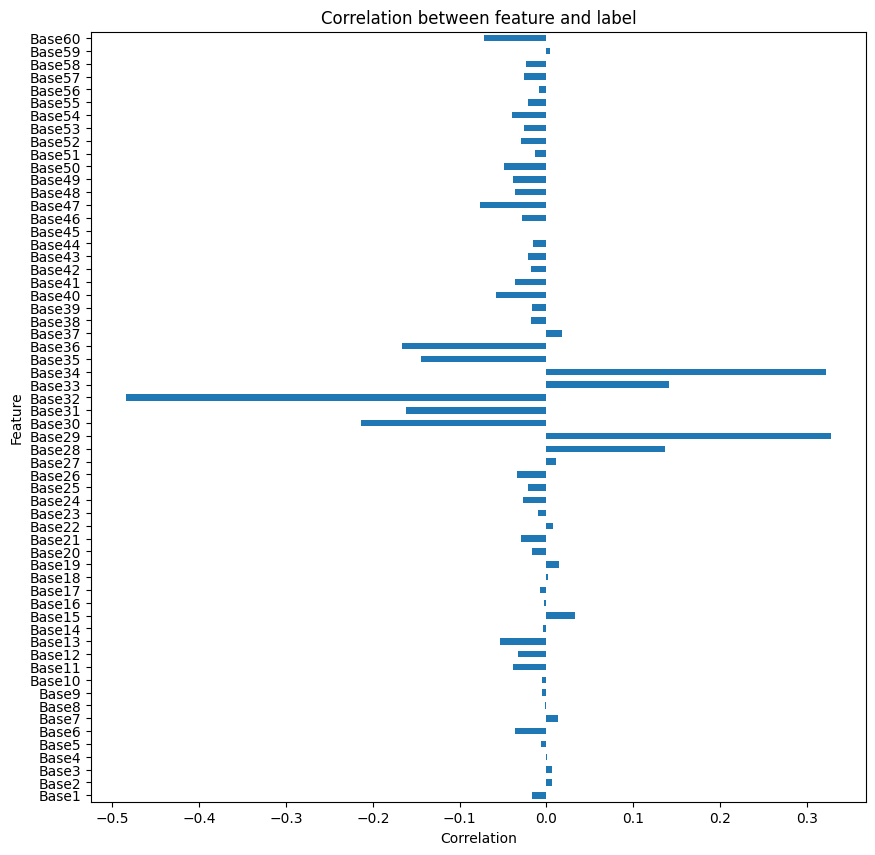

In [56]:
# Correlation between feature and label
df = feature.copy()
df["label"] = label
corr_target = df.corr().loc['label',:].drop("label")

plt.title("Correlation between feature and label")
plt.ylabel("Feature")

corr_target.plot(kind='barh', figsize=(10,10))
plt.xlabel("Correlation")


In [9]:
df.head()

,Base1,Base2,Base3,Base4,Base5,Base6,Base7,Base8,Base9,Base10,...,Base52,Base53,Base54,Base55,Base56,Base57,Base58,Base59,Base60,label
0,1,1,0,2,1,3,2,1,0,3,...,2,1,1,0,2,3,1,3,2,0
1,0,2,0,1,1,1,2,1,1,2,...,3,2,1,1,1,1,1,2,1,0
2,2,0,2,2,3,2,0,0,2,2,...,0,1,2,2,2,2,0,3,2,0
3,2,2,2,1,3,2,1,2,3,3,...,2,3,3,3,3,1,1,1,1,0
4,2,1,3,1,0,2,1,1,1,1,...,1,3,3,2,0,1,1,1,3,0


In [10]:
# Bases 29 , 28, 33, 34  seems to be interesting
corr_target[corr_target >= 0.1]

Base28    0.137040
Base29    0.327395
Base33    0.141608
Base34    0.321763
Name: label, dtype: float64

In [11]:
# Clustering
linkage_data = linkage(df, method='ward', metric='euclidean')


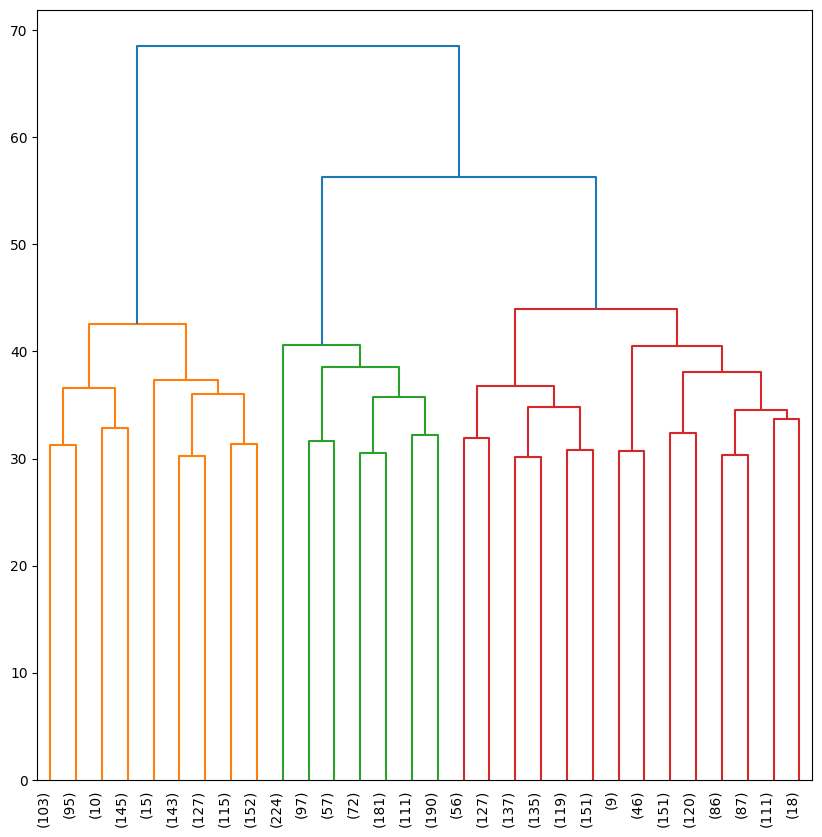

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

dendrogram(linkage_data, ax=ax, truncate_mode="lastp")

ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90, ha='right')

plt.show() 

In [13]:
np.unique(label)

array([0, 1, 2])

In [14]:
### Two ideas in mind: 
## Separate and Conquer 
## Use all data

Text(0.5, 1.0, 'Class distribution')

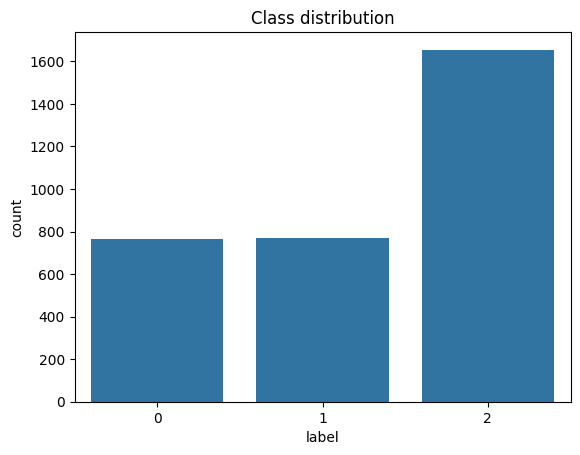

In [15]:
sns.countplot(data = df, x="label").set_title('Class distribution')

In [16]:
label_encoder.inverse_transform([0,1,2])

array(['EI', 'IE', 'N'], dtype=object)

In [17]:
np.shape(df[df["label"] == 0])

(767, 61)

In [18]:
np.shape(df[df["label"] == 1])

(768, 61)

In [19]:
np.shape(df[df["label"] == 2])

(1655, 61)

## Training


## Random forest for feature selection

In [86]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)

In [87]:
X_train_tensor = torch.from_numpy(X_train.values).float()
y_train_tensor = torch.from_numpy(y_train[0].values).long()
X_test_tensor = torch.from_numpy(X_test.values).float()
y_test_tensor = torch.from_numpy(y_test[0].values).long()

In [88]:
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, feature, label, cv=10)

array([0.9184953 , 0.92476489, 0.91222571, 0.88401254, 0.93416928,
       0.85893417, 0.90282132, 0.89028213, 0.88087774, 0.92163009])

Feature importance: 
[1.09889719e-03 5.84695638e-04 0.00000000e+00 3.18919871e-03
 4.29931554e-03 2.11519764e-03 2.78565707e-03 5.28595570e-04
 0.00000000e+00 3.41536499e-03 4.03245935e-03 2.96608186e-03
 3.48581242e-04 2.15137500e-03 2.39075550e-03 9.95000487e-04
 7.18052947e-03 1.17317967e-02 3.81124208e-03 0.00000000e+00
 7.60875452e-03 6.25505618e-03 2.92103585e-03 3.79135975e-03
 9.44607943e-03 4.91633988e-03 2.50075606e-03 4.28633614e-02
 2.25624571e-01 1.46739357e-01 1.12081572e-01 1.76531296e-01
 2.74289369e-02 6.58376810e-02 4.64452316e-02 6.07896655e-03
 0.00000000e+00 0.00000000e+00 1.24824184e-03 2.30985965e-03
 1.15268569e-03 8.50791815e-04 3.18780177e-03 1.02978293e-02
 3.44675622e-03 3.51581691e-04 1.84490698e-03 4.72662120e-03
 2.11325709e-03 6.30260751e-03 8.64697225e-05 3.68704175e-04
 1.74272729e-03 6.53987876e-03 2.11681476e-03 1.58716051e-03
 2.53387093e-03 3.07854756e-03 2.56394535e-03 8.53841248e-04]


c:\Users\guilh\projects\inteligencia_artificial\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


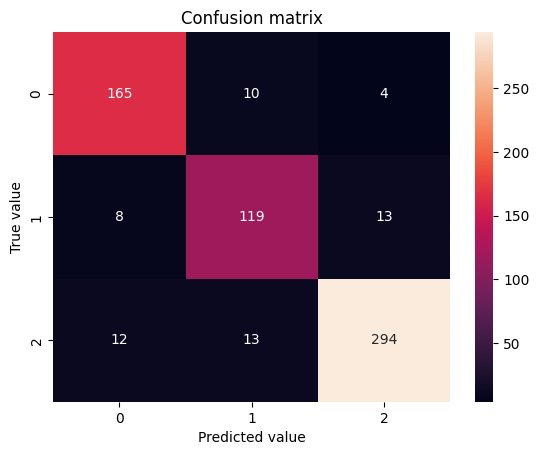

In [89]:
clf.fit(X_train.values, y_train.values)
prediction = clf.predict(X_test)

print("Feature importance: ")
print(clf.feature_importances_)


confusion = confusion_matrix(y_test, prediction)
sns.heatmap(confusion, annot=True, fmt='g') # font size

plt.title("Confusion matrix")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.show()

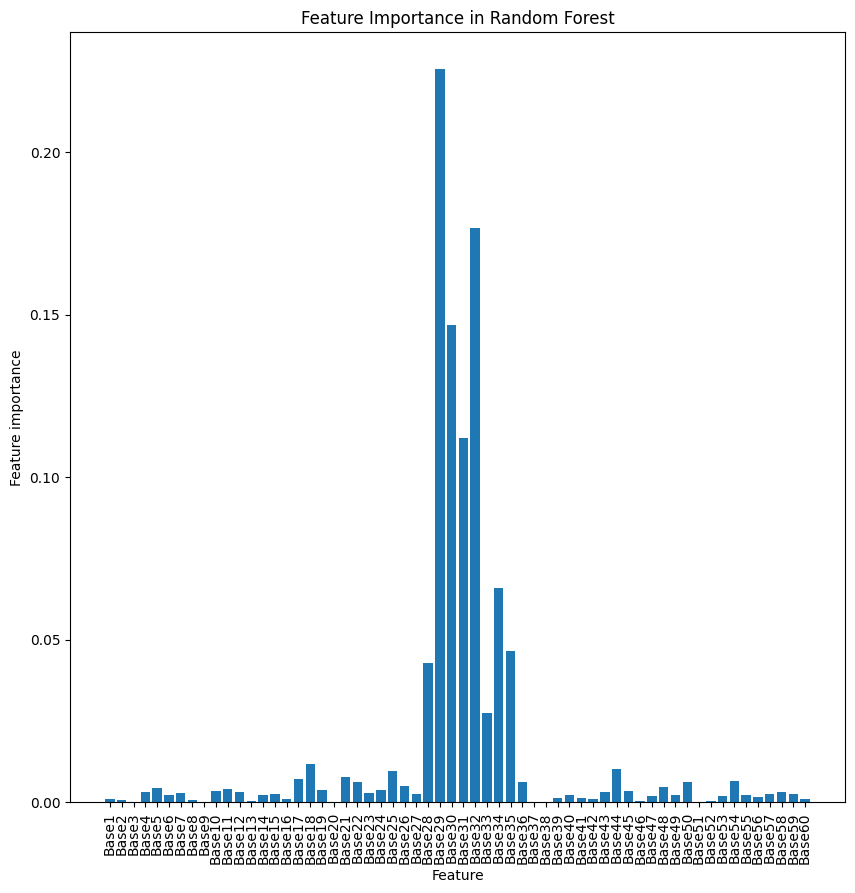

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.bar(range(X.shape[1]), clf.feature_importances_)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.title("Feature Importance in Random Forest")

plt.xlabel("Feature")
plt.ylabel("Feature importance")

plt.show()

In [91]:
accuracy_score(y_test, prediction)

0.9059561128526645

[Text(0.5439240828804348, 0.96875, 'Base29 <= 0.5\ngini = 0.612\nsamples = 2552\nvalue = [588, 628, 1336]\nclass = N'),
 Text(0.27585767663043476, 0.90625, 'Base32 <= 2.5\ngini = 0.632\nsamples = 1291\nvalue = [346.0, 626.0, 319.0]\nclass = IE'),
 Text(0.4098908797554348, 0.9375, 'True  '),
 Text(0.06939962635869565, 0.84375, 'Base30 <= 1.5\ngini = 0.466\nsamples = 659\nvalue = [3, 420, 236]\nclass = IE'),
 Text(0.010869565217391304, 0.78125, 'Base28 <= 2.5\ngini = 0.018\nsamples = 109\nvalue = [0, 1, 108]\nclass = N'),
 Text(0.005434782608695652, 0.71875, 'gini = 0.0\nsamples = 91\nvalue = [0, 0, 91]\nclass = N'),
 Text(0.016304347826086956, 0.71875, 'Base54 <= 0.5\ngini = 0.105\nsamples = 18\nvalue = [0, 1, 17]\nclass = N'),
 Text(0.010869565217391304, 0.65625, 'Base43 <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = IE'),
 Text(0.005434782608695652, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = IE'),
 Text(0.016304347826086956, 0.59375, 'gini = 0.0\nsample

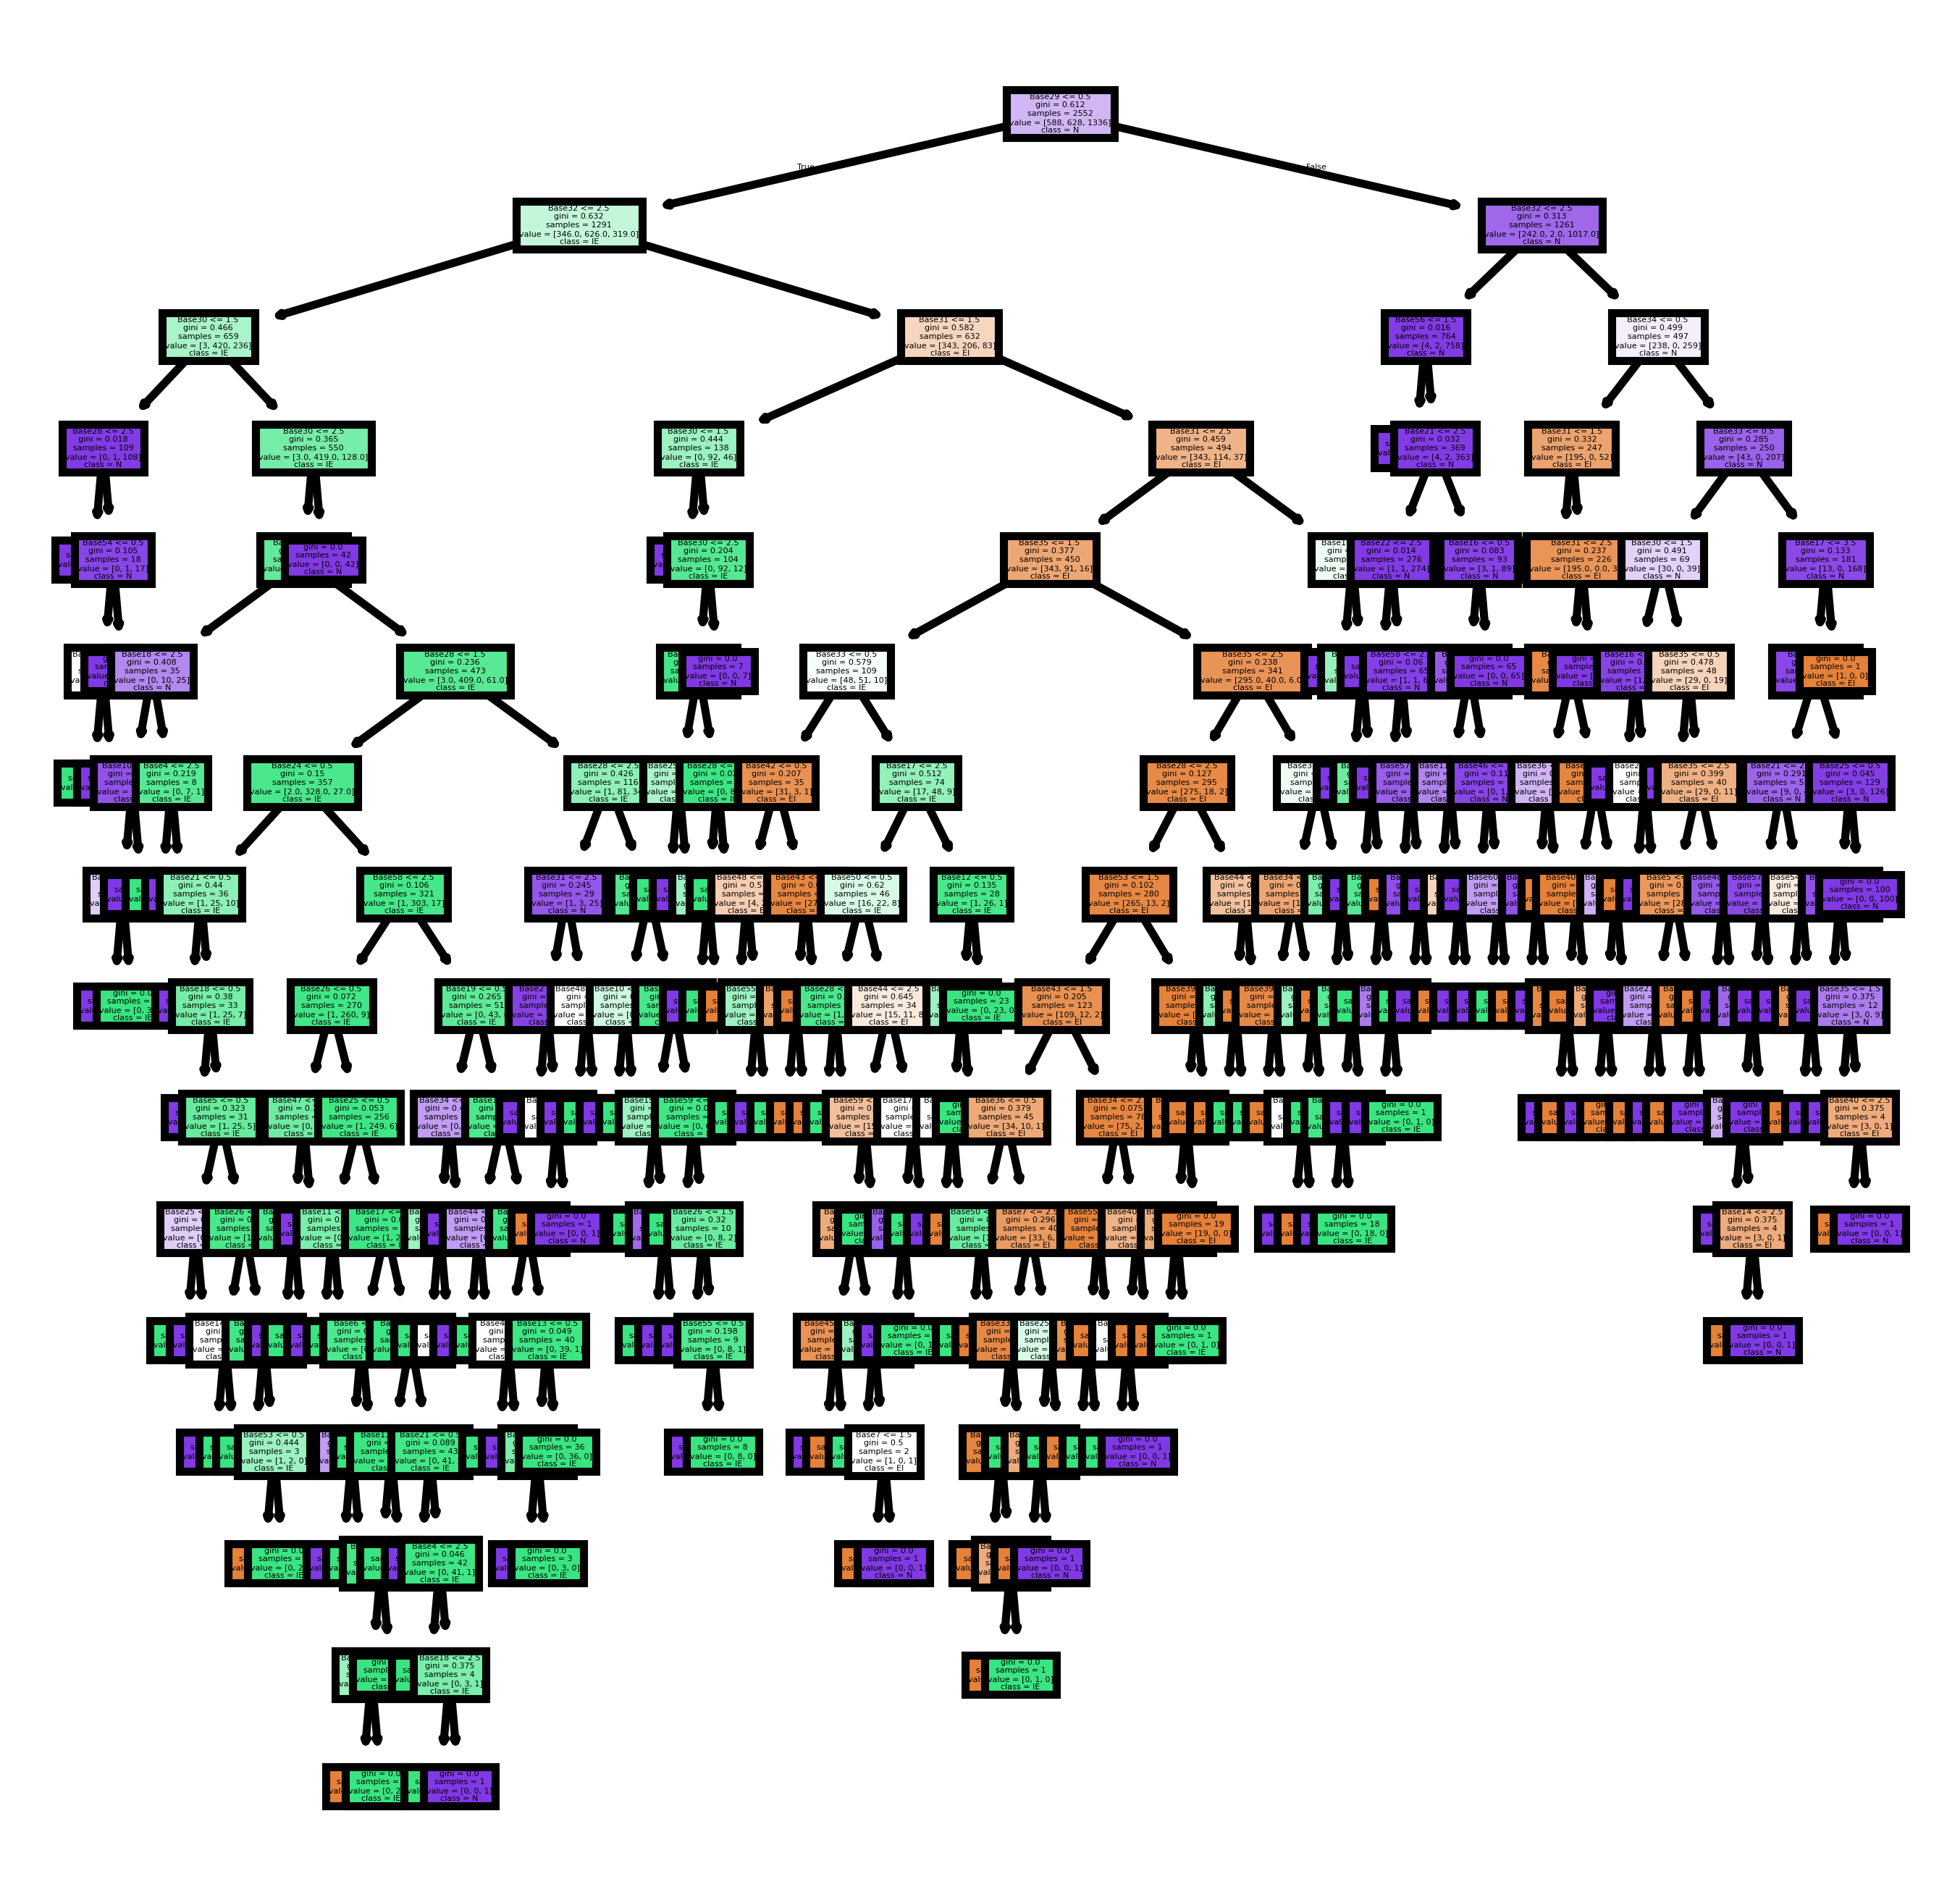

In [92]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(clf,
               feature_names = X.columns.values, 
               class_names=np.unique(y.values),
               filled = True)

## Random forest with feature selection

In [93]:
feature_df = pd.DataFrame({
    "Feature": feature.columns,
    "Importance": clf.feature_importances_
})

feature_df = feature_df.sort_values(by="Importance", ascending=False)

top_percent = 0.15
top_n = int(np.ceil(len(feature_df) * top_percent))

top_features = feature_df.iloc[:top_n]

print(top_features)

   Feature  Importance
28  Base29    0.225625
31  Base32    0.176531
29  Base30    0.146739
30  Base31    0.112082
33  Base34    0.065838
34  Base35    0.046445
27  Base28    0.042863
32  Base33    0.027429
17  Base18    0.011732


In [94]:
feature_selecion = feature[top_features["Feature"]]

feature_selecion.head()

,Base29,Base32,Base30,Base31,Base34,Base35,Base28,Base33,Base18
0,0,3,2,2,3,2,1,1,2
1,2,3,2,2,0,2,0,2,2
2,1,3,2,2,0,2,1,2,3
3,0,3,2,2,3,2,1,0,0
4,0,3,1,2,0,2,2,2,1


In [97]:
X_train_experimental, X_test_experimental, y_train_experimental, y_test_experimental = \
    train_test_split(feature_selecion, label, test_size=0.2, random_state=42)

In [98]:
X_train_tensor_experimental = torch.from_numpy(X_train.values).float()
y_train_tensor_experimental = torch.from_numpy(y_train[0].values).long()
X_test_tensor_experimental = torch.from_numpy(X_test.values).float()
y_test_tensor_experimental = torch.from_numpy(y_test[0].values).long()

In [102]:
clf_with_feature_selection = DecisionTreeClassifier(random_state=0)
cross_val_score(clf_with_feature_selection, feature_selecion, label, cv=10)

array([0.92789969, 0.90595611, 0.92163009, 0.91222571, 0.94043887,
       0.89341693, 0.93730408, 0.89028213, 0.89655172, 0.92789969])

Feature importance: 
[0.22878037 0.18802558 0.16746155 0.12704305 0.09001763 0.06517717
 0.05732168 0.04229353 0.03387943]


c:\Users\guilh\projects\inteligencia_artificial\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


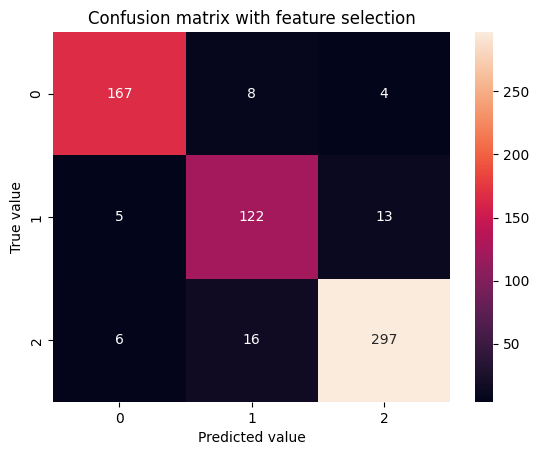

In [104]:
clf_with_feature_selection.fit(X_train_experimental.values, y_train_experimental.values)
prediction = clf_with_feature_selection.predict(X_test_experimental)

print("Feature importance: ")
print(clf_with_feature_selection.feature_importances_)


confusion = confusion_matrix(y_test, prediction)
sns.heatmap(confusion, annot=True, fmt='g') # font size

plt.title("Confusion matrix with feature selection")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.show()

In [105]:
accuracy_score(y_test, prediction)

0.9184952978056427

[Text(0.5978913483796297, 0.9722222222222222, 'Base29 <= 0.5\ngini = 0.612\nsamples = 2552\nvalue = [588, 628, 1336]\nclass = N'),
 Text(0.31754195601851853, 0.9166666666666666, 'Base32 <= 2.5\ngini = 0.632\nsamples = 1291\nvalue = [346.0, 626.0, 319.0]\nclass = IE'),
 Text(0.4577166521990741, 0.9444444444444444, 'True  '),
 Text(0.07173032407407408, 0.8611111111111112, 'Base30 <= 1.5\ngini = 0.466\nsamples = 659\nvalue = [3, 420, 236]\nclass = IE'),
 Text(0.007407407407407408, 0.8055555555555556, 'Base28 <= 2.5\ngini = 0.018\nsamples = 109\nvalue = [0, 1, 108]\nclass = N'),
 Text(0.003703703703703704, 0.75, 'gini = 0.0\nsamples = 91\nvalue = [0, 0, 91]\nclass = N'),
 Text(0.011111111111111112, 0.75, 'Base32 <= 1.5\ngini = 0.105\nsamples = 18\nvalue = [0, 1, 17]\nclass = N'),
 Text(0.007407407407407408, 0.6944444444444444, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13]\nclass = N'),
 Text(0.014814814814814815, 0.6944444444444444, 'Base33 <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 

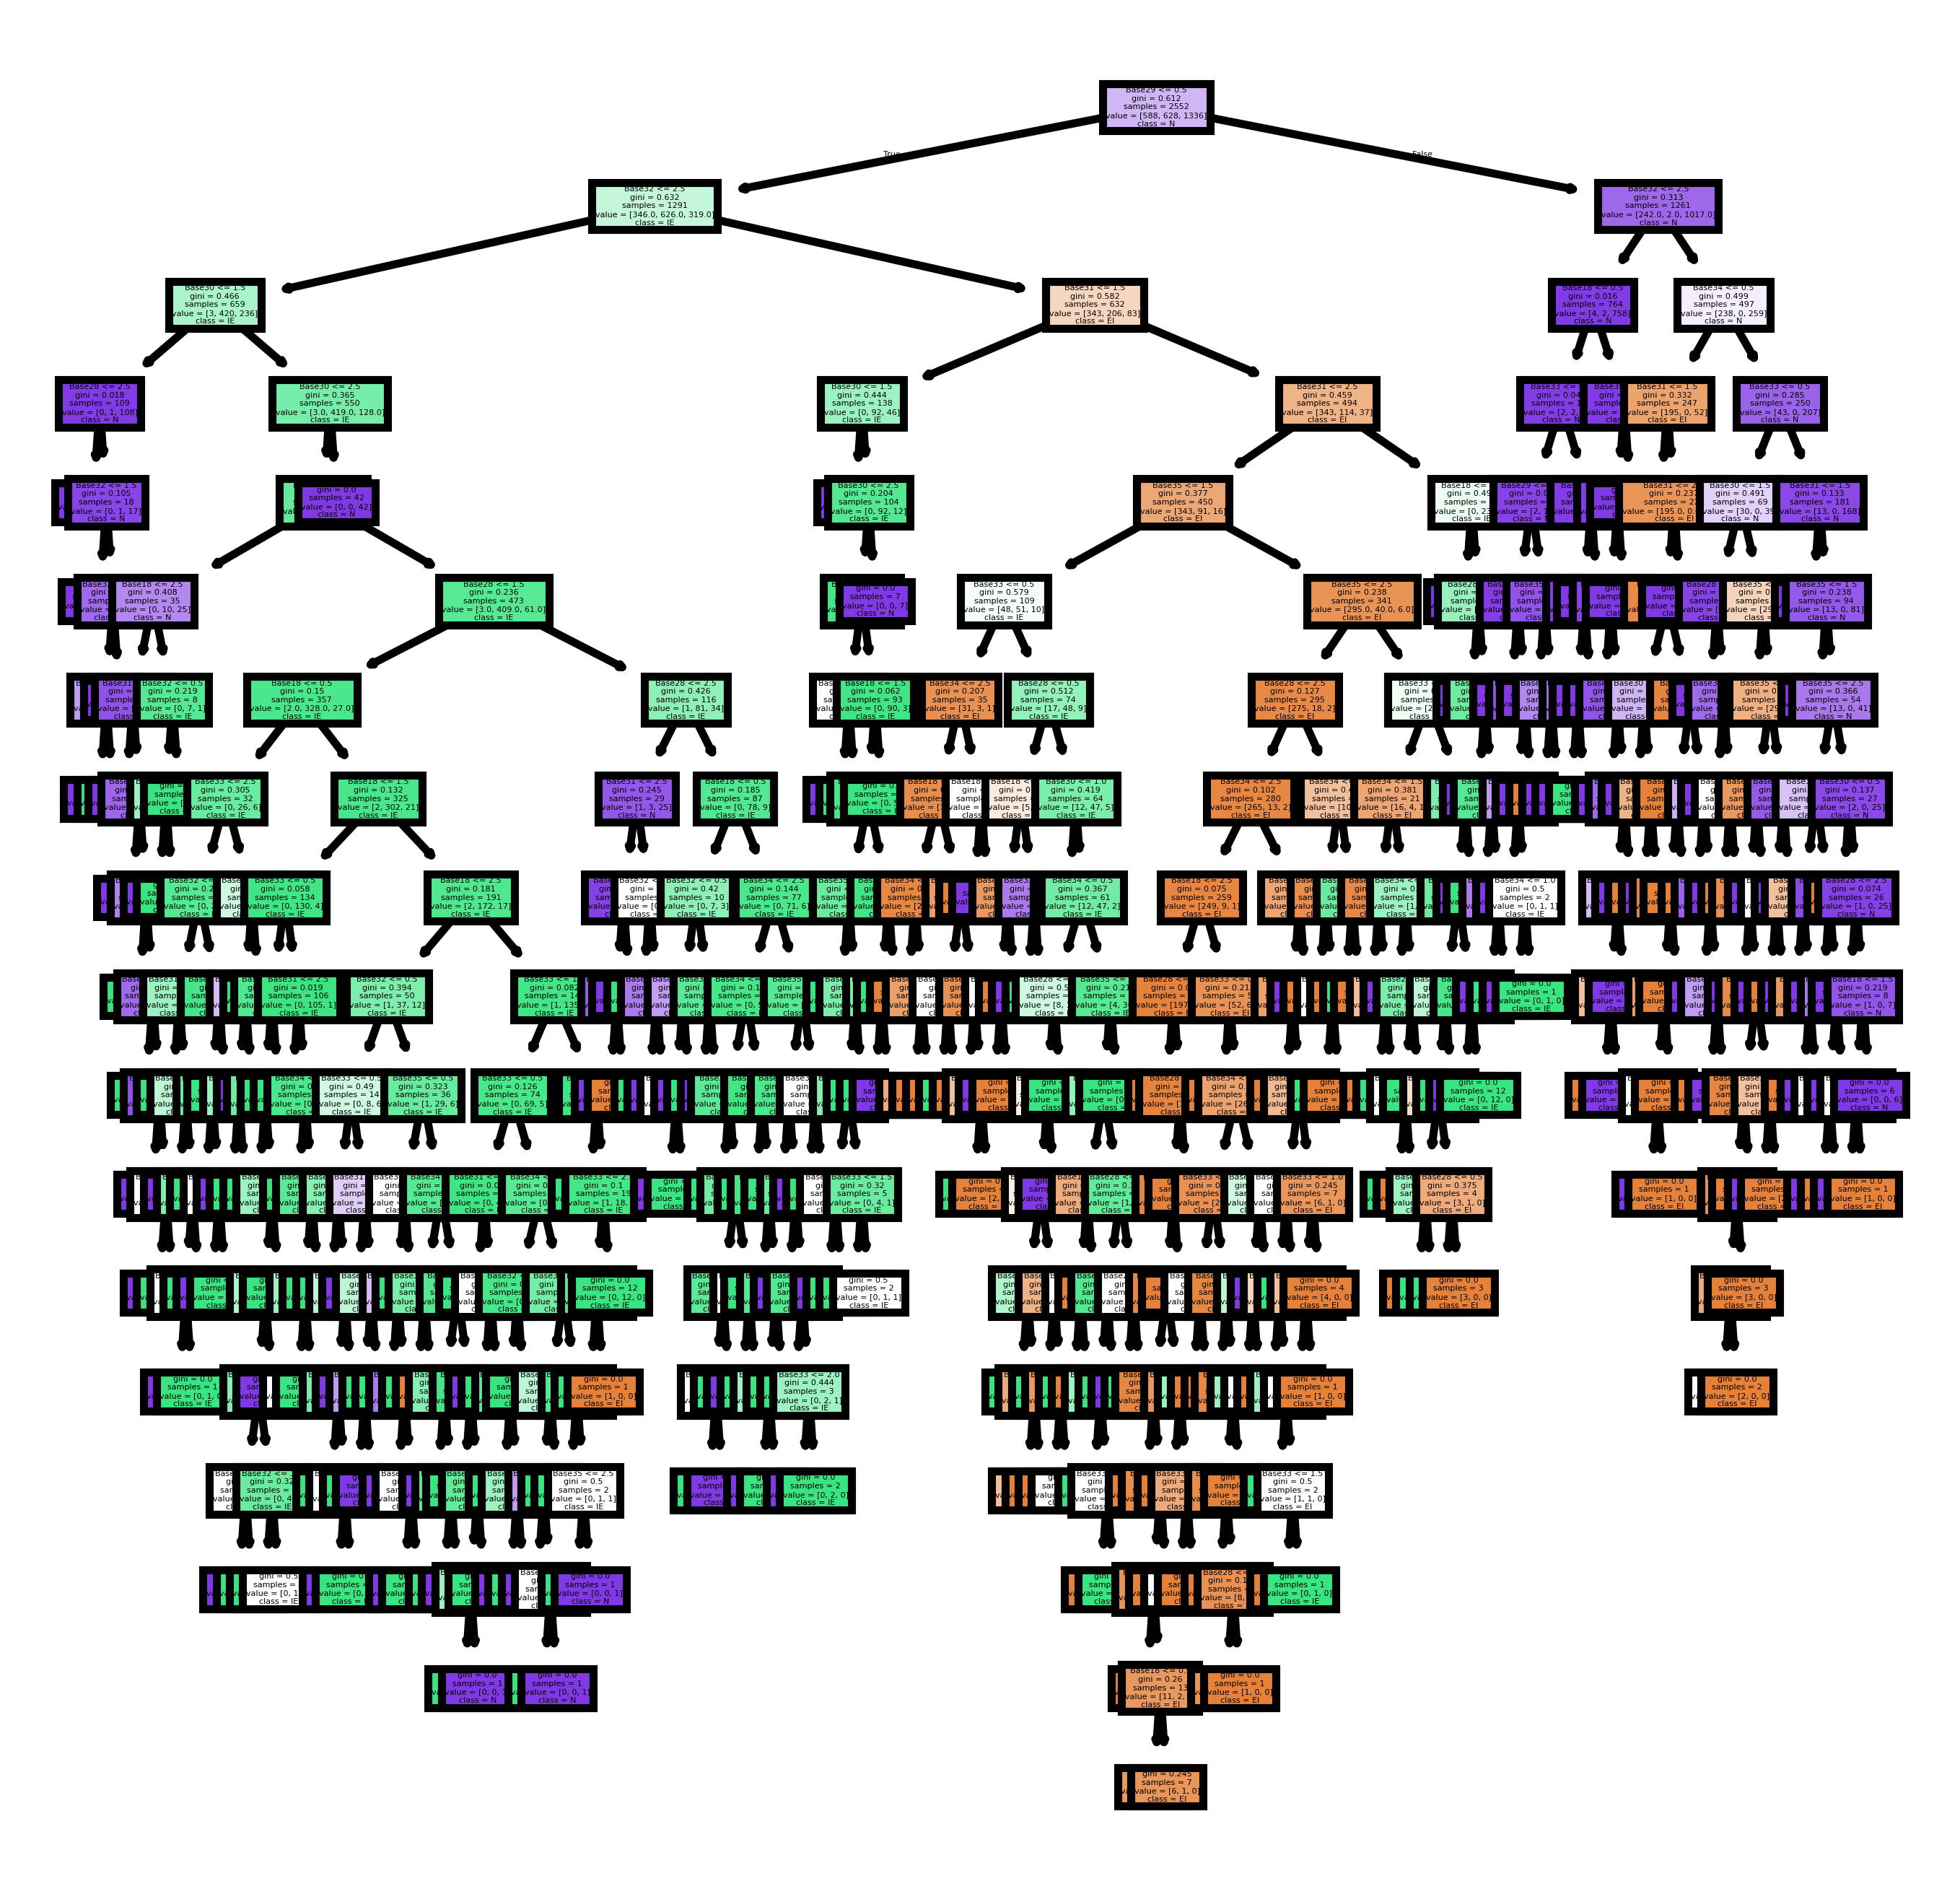

In [107]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(clf_with_feature_selection,
               feature_names = feature_selecion.columns, 
               class_names=np.unique(y.values),
               filled = True)

## Logistic Regression

In [108]:
def train_model(model, num_epochs, X_train_tensor, y_train_tensor, optimizer, criterion):
  for epoch in range(num_epochs):
      outputs = model(X_train_tensor)
      loss = criterion(outputs, y_train_tensor)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if (epoch + 1) % 100 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [28]:
def eval_model(model, X_test_tensor, y_test):
  with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor)
    predicted_classes = torch.argmax(predictions, dim=1)
    accuracy = accuracy_score(y_test, predicted_classes.numpy())
    cm = confusion_matrix(y_test, predicted_classes.numpy())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return predictions, accuracy, disp

In [29]:
dc = OrderedDict()
input_size = X.shape[1]
output_size = len(np.unique(y))
dc = OrderedDict()
dc['input_layer'] = nn.Linear(input_size, output_size)
dc['output_layer'] = nn.Softmax()
logistic_regression = nn.Sequential(dc)

In [30]:
num_epochs = 10000
learning_rate = 0.001

optimizer = optim.Adam(logistic_regression.parameters(), lr=learning_rate)
#criterion = nn.BCELoss()
criterion = nn.CrossEntropyLoss()

In [31]:
train_model(logistic_regression, num_epochs, X_train_tensor, y_train_tensor, optimizer, criterion)

c:\Users\guilh\projects\inteligencia_artificial\env\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch [100/10000], Loss: 0.9453
Epoch [200/10000], Loss: 0.8704
Epoch [300/10000], Loss: 0.8341
Epoch [400/10000], Loss: 0.8133
Epoch [500/10000], Loss: 0.7993
Epoch [600/10000], Loss: 0.7886
Epoch [700/10000], Loss: 0.7801
Epoch [800/10000], Loss: 0.7730
Epoch [900/10000], Loss: 0.7669
Epoch [1000/10000], Loss: 0.7616
Epoch [1100/10000], Loss: 0.7569
Epoch [1200/10000], Loss: 0.7528
Epoch [1300/10000], Loss: 0.7491
Epoch [1400/10000], Loss: 0.7457
Epoch [1500/10000], Loss: 0.7427
Epoch [1600/10000], Loss: 0.7399
Epoch [1700/10000], Loss: 0.7373
Epoch [1800/10000], Loss: 0.7350
Epoch [1900/10000], Loss: 0.7327
Epoch [2000/10000], Loss: 0.7307
Epoch [2100/10000], Loss: 0.7287
Epoch [2200/10000], Loss: 0.7269
Epoch [2300/10000], Loss: 0.7252
Epoch [2400/10000], Loss: 0.7235
Epoch [2500/10000], Loss: 0.7220
Epoch [2600/10000], Loss: 0.7205
Epoch [2700/10000], Loss: 0.7191
Epoch [2800/10000], Loss: 0.7178
Epoch [2900/10000], Loss: 0.7165
Epoch [3000/10000], Loss: 0.7152
Epoch [3100/10000],

In [32]:
predictions, accuracy, disp = eval_model(logistic_regression, X_test_tensor, y_test)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.8464


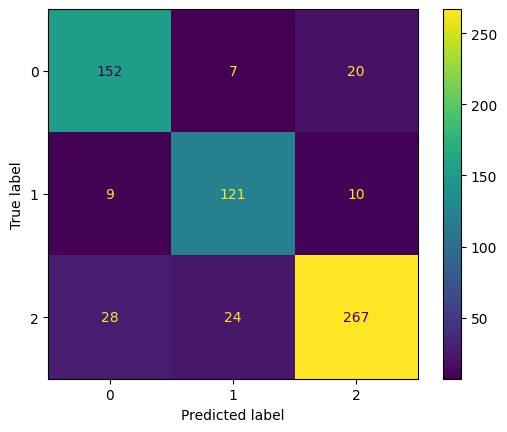

In [33]:
disp.plot()

In [34]:
summary(logistic_regression)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            183
├─Softmax: 1-2                           --
Total params: 183
Trainable params: 183
Non-trainable params: 0

c:\Users\guilh\projects\inteligencia_artificial\env\Lib\site-packages\torch\overrides.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  result = torch_func_method(public_api, types, args, kwargs)

(process:21844): Pango-WARNING **: 18:03:52.286: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


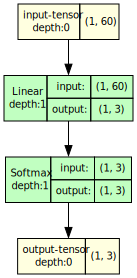

In [35]:
model_graph = draw_graph(logistic_regression, input_size=(1, input_size), roll=True)
model_graph.visual_graph

## Multi-layer Perceptron

In [36]:
hidden_dim_array = [20, 30, 20]

In [37]:
dc = OrderedDict()
dc['input_layer'] = nn.Linear(input_size, hidden_dim_array[0])
for i in range(len(hidden_dim_array)-1):
      dc['input_layer_'+str(i)]=nn.Linear(hidden_dim_array[i], hidden_dim_array[i+1])

dc['input_layer_'+str(len(hidden_dim_array))]=nn.Linear(hidden_dim_array[-1], hidden_dim_array[-1])
dc['output_layer_prev'] = nn.Linear(hidden_dim_array[-1], output_size)
dc['output_layer'] = nn.Softmax()
mlp = nn.Sequential(dc)

In [38]:
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [39]:
num_epochs = 2500 # Beyond this number the model start to get worse score
train_model(mlp, num_epochs, X_train_tensor, y_train_tensor, optimizer, criterion)

c:\Users\guilh\projects\inteligencia_artificial\env\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch [100/2500], Loss: 0.8293
Epoch [200/2500], Loss: 0.6826
Epoch [300/2500], Loss: 0.6657
Epoch [400/2500], Loss: 0.6594
Epoch [500/2500], Loss: 0.6569
Epoch [600/2500], Loss: 0.6534
Epoch [700/2500], Loss: 0.6523
Epoch [800/2500], Loss: 0.6512
Epoch [900/2500], Loss: 0.6506
Epoch [1000/2500], Loss: 0.6502
Epoch [1100/2500], Loss: 0.6502
Epoch [1200/2500], Loss: 0.6498
Epoch [1300/2500], Loss: 0.6496
Epoch [1400/2500], Loss: 0.6495
Epoch [1500/2500], Loss: 0.6494
Epoch [1600/2500], Loss: 0.6493
Epoch [1700/2500], Loss: 0.6492
Epoch [1800/2500], Loss: 0.6491
Epoch [1900/2500], Loss: 0.6491
Epoch [2000/2500], Loss: 0.6490
Epoch [2100/2500], Loss: 0.6490
Epoch [2200/2500], Loss: 0.6490
Epoch [2300/2500], Loss: 0.6489
Epoch [2400/2500], Loss: 0.6489
Epoch [2500/2500], Loss: 0.6489


In [40]:
predictions, accuracy, disp = eval_model(mlp, X_test_tensor, y_test)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.8323


In [41]:
summary(mlp)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            1,220
├─Linear: 1-2                            630
├─Linear: 1-3                            620
├─Linear: 1-4                            420
├─Linear: 1-5                            63
├─Softmax: 1-6                           --
Total params: 2,953
Trainable params: 2,953
Non-trainable params: 0

c:\Users\guilh\projects\inteligencia_artificial\env\Lib\site-packages\torch\overrides.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  result = torch_func_method(public_api, types, args, kwargs)

(process:23092): Pango-WARNING **: 18:04:11.882: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


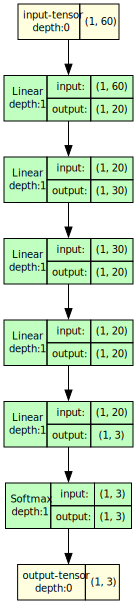

In [42]:
model_graph = draw_graph(mlp, input_size=(1, input_size), roll=True)
model_graph.visual_graph

## Deep Learning

In [43]:
dlm = nn.Sequential(
    nn.Linear(60, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 3)
)

In [44]:
optimizer = optim.Adam(dlm.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [45]:
from sklearn.preprocessing import StandardScaler

num_epochs = 10000
train_model(dlm, num_epochs, X_train_tensor, y_train_tensor, optimizer, criterion)

Epoch [100/10000], Loss: 0.4405
Epoch [200/10000], Loss: 0.2914
Epoch [300/10000], Loss: 0.2045
Epoch [400/10000], Loss: 0.1528
Epoch [500/10000], Loss: 0.1173
Epoch [600/10000], Loss: 0.0869
Epoch [700/10000], Loss: 0.0800
Epoch [800/10000], Loss: 0.0642
Epoch [900/10000], Loss: 0.0534
Epoch [1000/10000], Loss: 0.0434
Epoch [1100/10000], Loss: 0.0376
Epoch [1200/10000], Loss: 0.0375
Epoch [1300/10000], Loss: 0.0300
Epoch [1400/10000], Loss: 0.0251
Epoch [1500/10000], Loss: 0.0274
Epoch [1600/10000], Loss: 0.0202
Epoch [1700/10000], Loss: 0.0238
Epoch [1800/10000], Loss: 0.0212
Epoch [1900/10000], Loss: 0.0190
Epoch [2000/10000], Loss: 0.0146
Epoch [2100/10000], Loss: 0.0180
Epoch [2200/10000], Loss: 0.0179
Epoch [2300/10000], Loss: 0.0183
Epoch [2400/10000], Loss: 0.0121
Epoch [2500/10000], Loss: 0.0163
Epoch [2600/10000], Loss: 0.0131
Epoch [2700/10000], Loss: 0.0111
Epoch [2800/10000], Loss: 0.0099
Epoch [2900/10000], Loss: 0.0101
Epoch [3000/10000], Loss: 0.0094
Epoch [3100/10000],

In [46]:
predictions, accuracy, disp = eval_model(dlm, X_test_tensor, y_test)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.8621


In [47]:
summary(dlm)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            7,808
├─ReLU: 1-2                              --
├─Dropout: 1-3                           --
├─Linear: 1-4                            387
Total params: 8,195
Trainable params: 8,195
Non-trainable params: 0


(process:4112): Pango-WARNING **: 18:05:19.467: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


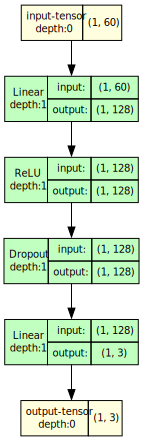

In [48]:
model_graph = draw_graph(dlm, input_size=(1, input_size), roll=True)
model_graph.visual_graph